In [1]:
%matplotlib inline

In [3]:
import pandas as pd 
import os 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
#File to load
csv_file = os.path.join(os.getcwd(), 'Resources','US_Accidents_Dec20_Updated.csv')

In [5]:
#Read csv file
accidents_df = pd.read_csv(csv_file)

In [6]:
#List columns for reference
accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
#Create data frame with desired columns
trimmed_accidents_df = accidents_df[["ID","Severity","Start_Time"]]

In [8]:
#View new data frame
trimmed_accidents_df.head()

,ID,Severity,Start_Time
0,A-1,2,2019-05-21 08:29:55
1,A-2,2,2019-10-07 17:43:09
2,A-3,2,2020-12-13 21:53:00
3,A-4,2,2018-04-17 16:51:23
4,A-5,3,2016-08-31 17:40:49


In [9]:
#Converting the Start_Time column to date time format
trimmed_accidents_df['Start_Time'] = pd.to_datetime(trimmed_accidents_df['Start_Time'], format= "%Y-%m-%d %H:%M:%S")

<ipython-input-9-6f436278576d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_accidents_df['Start_Time'] = pd.to_datetime(trimmed_accidents_df['Start_Time'], format= "%Y-%m-%d %H:%M:%S")


In [10]:
#Create a column to represent the Hour of the day each accident happened
trimmed_accidents_df['Hour'] = trimmed_accidents_df['Start_Time'].dt.round('H').dt.hour
trimmed_accidents_df.head()

<ipython-input-10-59a8c760ee41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_accidents_df['Hour'] = trimmed_accidents_df['Start_Time'].dt.round('H').dt.hour


,ID,Severity,Start_Time,Hour
0,A-1,2,2019-05-21 08:29:55,8
1,A-2,2,2019-10-07 17:43:09,18
2,A-3,2,2020-12-13 21:53:00,22
3,A-4,2,2018-04-17 16:51:23,17
4,A-5,3,2016-08-31 17:40:49,18


In [11]:
trimmed_accidents_df = trimmed_accidents_df.copy()

In [12]:
#Dropping old Start_Time column
trimmed_accidents_df.drop(columns =["Start_Time"], inplace = True)

In [13]:
trimmed_accidents_df

,ID,Severity,Hour
0,A-1,2,8
1,A-2,2,18
2,A-3,2,22
3,A-4,2,17
4,A-5,3,18
...,...,...,...
2906605,A-2906606,2,9
2906606,A-2906607,2,2
2906607,A-2906608,2,13
2906608,A-2906609,2,23


In [14]:
trimmed_accidents_df['ID'] = trimmed_accidents_df['ID'].str.replace(r'\D', '').astype(int)


<ipython-input-14-bef435a7e000>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  trimmed_accidents_df['ID'] = trimmed_accidents_df['ID'].str.replace(r'\D', '').astype(int)


In [15]:
#Creating groups based on Hour
hour_grouped = trimmed_accidents_df.groupby('Hour')

#Count how many accidents per each Hour
count_per_hour = hour_grouped['Hour'].count()


In [16]:
#Set x axis and tick locations
x_axis = np.arange(len(trimmed_accidents_df["Hour"]))
tick_locations = [value for value in x_axis]

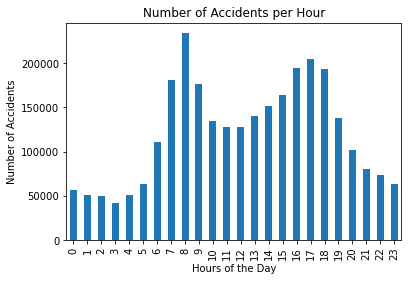

In [17]:
#Create a bar chart based on the accidents per 
hour_chart = count_per_hour.plot(kind = 'bar')
#Set the x label and y label
hour_chart.set_xlabel("Hours of the Day")
hour_chart.set_ylabel("Number of Accidents")
hour_chart.set_title("Number of Accidents per Hour")
plt.show()

In [18]:
#Create chart of severity versus time of the day
severity_chart = trimmed_accidents_df.plot.scatter('Hour','ID', s=None, c='Severity', colormap='viridis')

Error in callback <function flush_figures at 0x000001C8815960D0> (for post_execute):


KeyboardInterrupt: 